In [1]:
from functions import *
from settings import *

%store -r __RequiredPackages
%store -r __JupyterOptions

In [2]:
__RequiredPackages

In [3]:
__JupyterOptions

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Import data
data = pd.read_csv('train.csv')
validation = pd.read_csv('test.csv')

In [5]:
# Check the size of training and testset
print("Size of the trainingset: {} observations".format(data.shape[0]))
print("Size of the testset:     {} observations".format(validation.shape[0]))

Size of the trainingset: 1460 observations
Size of the testset:     1459 observations


In [6]:
# Check for duplicate rows
np.sum(data.duplicated())

0

In [29]:
# Overview of target variable
print("Number of missing values for the target variable in the trainset: {}".format(data['SalePrice'].isnull().sum()))

# Add logscaled version of saleprice
data['LogSalePrice'] = np.log(data['SalePrice'])

# Description of both versions of saleprice
data[['SalePrice', 'LogSalePrice']].describe()

Number of missing values for the target variable in the trainset: 0


,SalePrice,LogSalePrice
count,1460.000000,1460.000000
mean,180921.195890,12.024051
std,79442.502883,0.399452
min,34900.000000,10.460242
25%,129975.000000,11.775097
50%,163000.000000,12.001505
75%,214000.000000,12.273731
max,755000.000000,13.534473


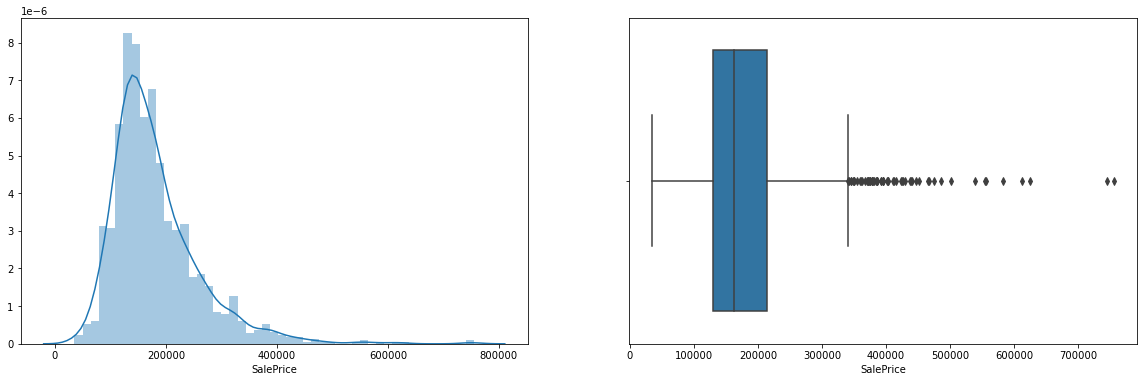

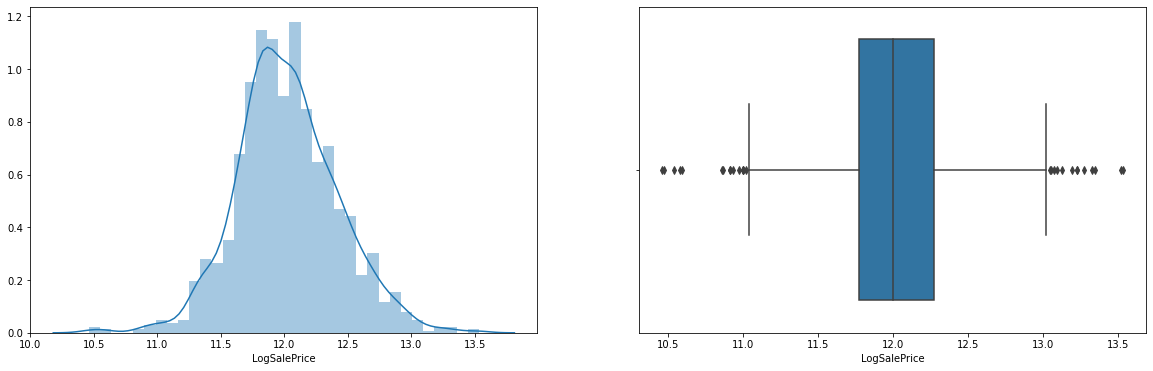

In [30]:
# Plot distribution of target
f, axes = plt.subplots(1, 2, figsize=(20, 6))
_ = sns.distplot(data['SalePrice'], ax=axes[0])
_ = sns.boxplot(data['SalePrice'], ax=axes[1])

f, axes = plt.subplots(1, 2, figsize=(20, 6))
_ = sns.distplot(data['LogSalePrice'], ax=axes[0])
_ = sns.boxplot(data['LogSalePrice'], ax=axes[1])

In [32]:
# Show columns names
pd.DataFrame([data.columns[x:x+10] for x in range(0, 80, 10)])

,0,1,2,3,4,5,6,7,8,9
0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities
1,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt
2,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation
3,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
4,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
5,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt
6,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch
7,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [37]:
# Show missing values
data.isna().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu     690 
LotFrontage     259 
GarageQual      81  
GarageCond      81  
GarageType      81  
GarageYrBlt     81  
GarageFinish    81  
BsmtFinType2    38  
BsmtExposure    38  
BsmtQual        37  
BsmtCond        37  
BsmtFinType1    37  
MasVnrArea      8   
MasVnrType      8   
Electrical      1   
RoofMatl        0   
dtype: int64

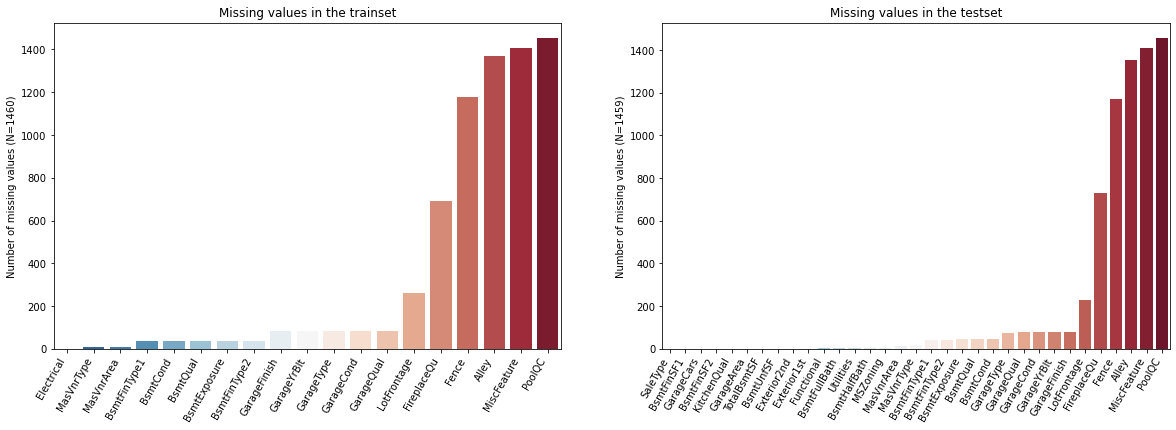

In [38]:
# Visualize NA's per column
f, axes = plt.subplots(1, 2, figsize=(20, 6))

NA_frame_train = pd.DataFrame(data.columns, columns=['column_name'])
NA_frame_train['nans'] = data.apply(lambda x: x.isnull().sum(),axis=0).values
NA_frame_train = NA_frame_train.sort_values('nans')
NA_plot_train = sns.barplot(x="column_name", y="nans", data=NA_frame_train[NA_frame_train['nans'] > 0], palette="RdBu_r", ax=axes[0])
NA_plot_train.set_title('Missing values in the trainset')
NA_plot_train.set_ylabel('Number of missing values (N={})'.format(data.shape[0]))    
NA_plot_train.set_xlabel('')
NA_plot_train.set_xticklabels(NA_plot_train.get_xticklabels(), rotation=60, ha='right');

NA_frame_test = pd.DataFrame(validation.columns, columns=['column_name'])
NA_frame_test['nans'] = validation.apply(lambda x: x.isnull().sum(),axis=0).values
NA_frame_test = NA_frame_test.sort_values('nans')
NA_plot_test = sns.barplot(x="column_name", y="nans", data=NA_frame_test[NA_frame_test['nans'] > 0], palette="RdBu_r", ax=axes[1])
NA_plot_test.set_title('Missing values in the testset')
NA_plot_test.set_ylabel('Number of missing values (N={})'.format(validation.shape[0]))    
NA_plot_test.set_xlabel('')
NA_plot_test.set_xticklabels(NA_plot_test.get_xticklabels(), rotation=60, ha='right');

In [40]:
# Impute missing values where they are not at random, meaning; the missingness indicates it is not part of the house

# For the following list, the data desciption already indicates that missing means not present in the house
NA_means_not_there_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
                          'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

data[NA_means_not_there_cols] = data[NA_means_not_there_cols].fillna('Not_present') 
validation[NA_means_not_there_cols] = validation[NA_means_not_there_cols].fillna('Not_present') 

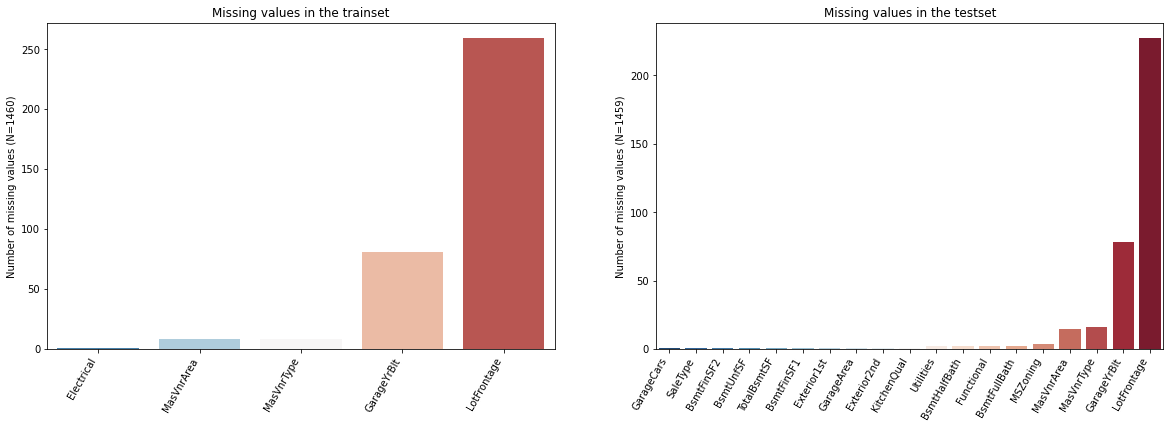

In [41]:
# Now let's see what data is really missing
f, axes = plt.subplots(1, 2, figsize=(20, 6))

NA_frame_train = pd.DataFrame(data.columns, columns=['column_name'])
NA_frame_train['nans'] = data.apply(lambda x: x.isnull().sum(),axis=0).values
NA_frame_train = NA_frame_train.sort_values('nans')
NA_plot_train = sns.barplot(x="column_name", y="nans", data=NA_frame_train[NA_frame_train['nans'] > 0], palette="RdBu_r", ax=axes[0])
NA_plot_train.set_title('Missing values in the trainset')
NA_plot_train.set_ylabel('Number of missing values (N={})'.format(data.shape[0]))    
NA_plot_train.set_xlabel('')
NA_plot_train.set_xticklabels(NA_plot_train.get_xticklabels(), rotation=60, ha='right');

NA_frame_test = pd.DataFrame(validation.columns, columns=['column_name'])
NA_frame_test['nans'] = validation.apply(lambda x: x.isnull().sum(),axis=0).values
NA_frame_test = NA_frame_test.sort_values('nans')
NA_plot_test = sns.barplot(x="column_name", y="nans", data=NA_frame_test[NA_frame_test['nans'] > 0], palette="RdBu_r", ax=axes[1])
NA_plot_test.set_title('Missing values in the testset')
NA_plot_test.set_ylabel('Number of missing values (N={})'.format(validation.shape[0]))    
NA_plot_test.set_xlabel('')
NA_plot_test.set_xticklabels(NA_plot_test.get_xticklabels(), rotation=60, ha='right');

In [43]:
# Check if there are any specific rows with many missing values
display_side_by_side(pd.DataFrame(data.apply(lambda x: x.count() - data.shape[1] -1, axis=1).value_counts(), 
                                  columns=["Missing values per row for the trainset"]), 
                     pd.DataFrame(validation.apply(lambda x: x.count() - 
                     validation.shape[1], axis=1).value_counts(), columns=["Missing values per row for the testset"]))

,Missing values per row for the trainset
-1,1120
-2,325
-3,13
-4,2
,Missing values per row for the testset
0,1139
-1,293
-2,19
-3,7
-6,1


In [46]:
# I am assuming that the missing LotFrontage indicates that there is 0 Linear feet of street connected to property
# Especially since the min LotFrontage is greater than 0
pd.DataFrame(data['LotFrontage'].describe())

data['LotFrontage'] = data['LotFrontage'].fillna(0)
validation['LotFrontage'] = validation['LotFrontage'].fillna(0)

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


In [47]:
# All houses that do not have information on the GarageYrBlt do not have a garage (Most for test) 
missing_GarageYrBlt = data[data['GarageYrBlt'].isnull()]
missing_GarageYrBlt['GarageType'].value_counts()

Not_present    81
Name: GarageType, dtype: int64

In [48]:
# It appears these houses tend to be the relatively cheap houses
mean_enc_missing_GarageYrBlt = np.mean(data[data['GarageYrBlt'].isnull()]['SalePrice'])
print("The average SalePrice for a house with missing GarageYrBlt is: {0:.0f}".format(mean_enc_missing_GarageYrBlt))

The average SalePrice for a house with missing GarageYrBlt is: 103317


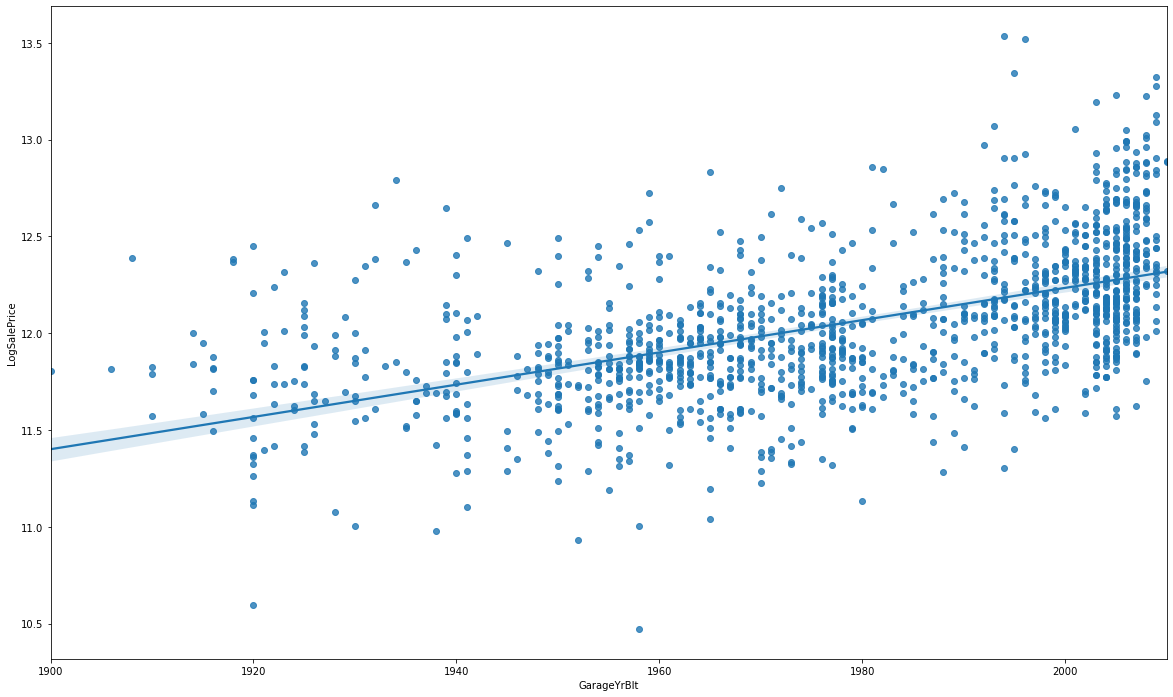

In [61]:
# The relation between Saleprice and GarageYrBlt is positive; The newer the garage, the more expensive the house (on average)
lmp = sns.regplot(x='GarageYrBlt', y='LogSalePrice', data=data)

In [53]:
# A median imputation for continuous vars and mode imputation for categorical vars seems the best option
list_missing_columns = list(set(np.concatenate([NA_frame_train['column_name'][NA_frame_train['nans'] > 0].values, 
                                                NA_frame_test['column_name'][NA_frame_test['nans'] > 0].values])))
list_missing_columns.remove('LotFrontage')
list_missing_columns.remove('GarageYrBlt')

cat_cols = []; num_cols = []

for column in range(len(list_missing_columns)):
    if data[list_missing_columns[column]].dtype == 'O': cat_cols.append(list_missing_columns[column])
    else: num_cols.append(list_missing_columns[column])

cat_cols_df = pd.DataFrame(cat_cols, columns=['Categorical columns'])
num_cols_df = pd.DataFrame(num_cols, columns=['Continious columns'])
display_side_by_side(cat_cols_df, num_cols_df)

,Categorical columns
0,Functional
1,MasVnrType
2,Exterior2nd
3,Electrical
4,Utilities
5,Exterior1st
6,KitchenQual
7,MSZoning
8,SaleType
,Continious columns


In [58]:
# Check variance among variables

# First create lists again of categorical and continuous variables
cat_cols = []; num_cols = []

for column in data.drop('SalePrice', axis=1).columns:
    if data[column].dtype == 'O': cat_cols.append(column)
    else: num_cols.append(column)

# Check the percentage of unique values for the continuous variables 
variance_continuous = pd.DataFrame(data[num_cols].columns, columns=['column_name'])
variance_continuous['unique_score'] = data[num_cols].apply(lambda x: x.nunique() / data.shape[0],axis=0).values

# Check the frequency ratio for categorical variables
variance_categorical = pd.DataFrame(data[cat_cols].columns, columns=['column_name'])
variance_categorical['unique_score'] = data[cat_cols].apply(lambda x: x.value_counts()[0] / data.shape[0],axis=0).values

display_side_by_side(variance_continuous.sort_values('unique_score'),
                     variance_categorical.sort_values('unique_score', ascending=False))

,column_name,unique_score
20,HalfBath,0.002055
18,BsmtHalfBath,0.002055
19,FullBath,0.002740
24,Fireplaces,0.002740
22,KitchenAbvGr,0.002740
17,BsmtFullBath,0.002740
26,GarageCars,0.003425
36,YrSold,0.003425
21,BedroomAbvGr,0.005479
33,PoolArea,0.005479


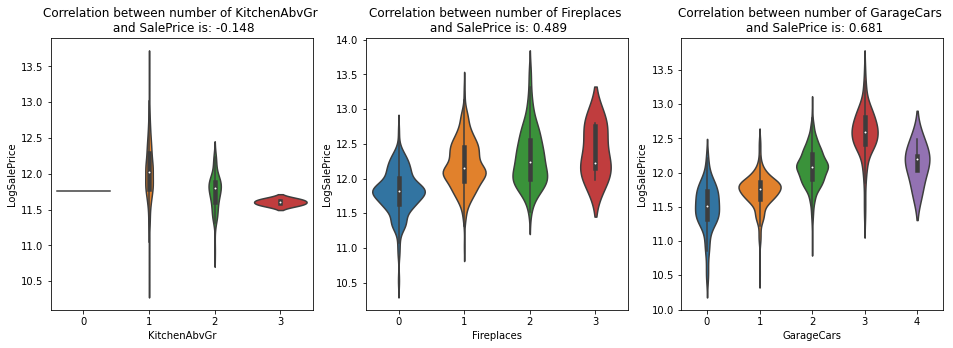

In [62]:
# Lets check if more kitchens, fireplaces or car spots in the garage on average means a higher SalePrice
count_vars = ['KitchenAbvGr', 'Fireplaces', 'GarageCars']

f, axes = plt.subplots(1, 3, figsize=(16, 5))
for i in range(0, len(count_vars)):
    _i = sns.violinplot(data=data, x = count_vars[i], y = 'LogSalePrice', ax=axes[i])
    _i = _i.set_title('Correlation between number of {0} \n and SalePrice is: {1:.3f}'.format(
            count_vars[i], np.corrcoef(data[count_vars[i]], data['LogSalePrice'])[0,1]))

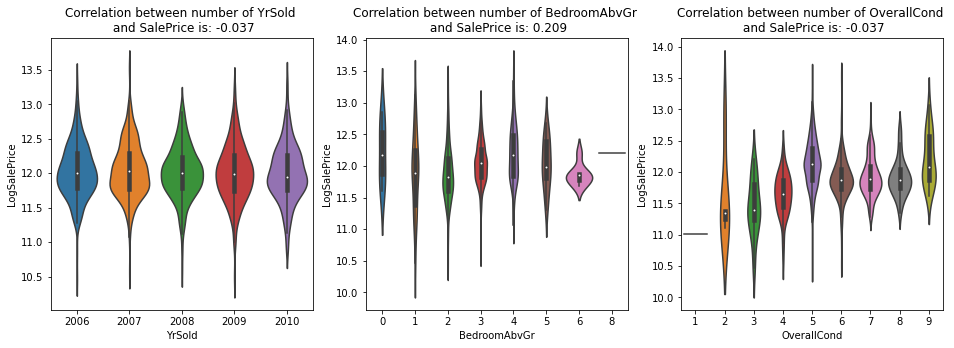

In [63]:
# Now we do the same for year sold, bedrooms above ground and overall condition
count_vars = ['YrSold', 'BedroomAbvGr', 'OverallCond']

f, axes = plt.subplots(1, 3, figsize=(16, 5))
for i in range(0, len(count_vars)):
    _i = sns.violinplot(data=data, x = count_vars[i], y = 'LogSalePrice', ax=axes[i])
    _i = _i.set_title('Correlation between number of {0} \n and SalePrice is: {1:.3f}'.format(
            count_vars[i], np.corrcoef(data[count_vars[i]], data['LogSalePrice'])[0,1]))

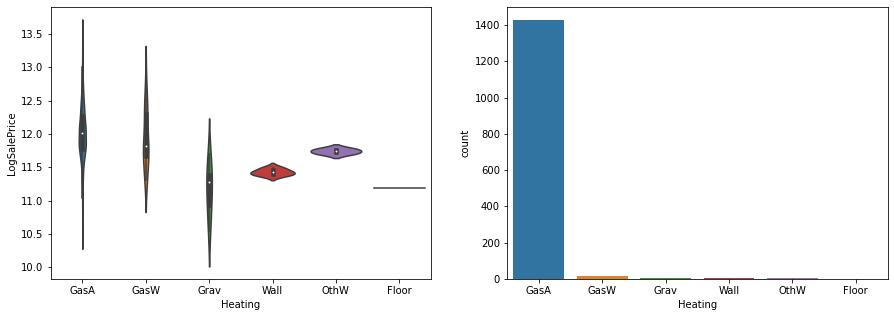

In [64]:
# Making heating binary is a last effort to get info from this variable
f, axes = plt.subplots(1, 2, figsize=(15, 5))
_ = sns.violinplot(data=data, x = 'Heating', y = 'LogSalePrice', ax=axes[0])
_ = sns.countplot(data=data, x = 'Heating', ax=axes[1])

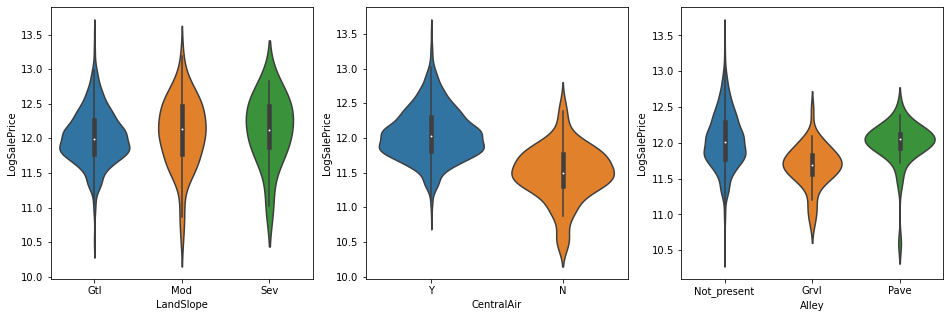

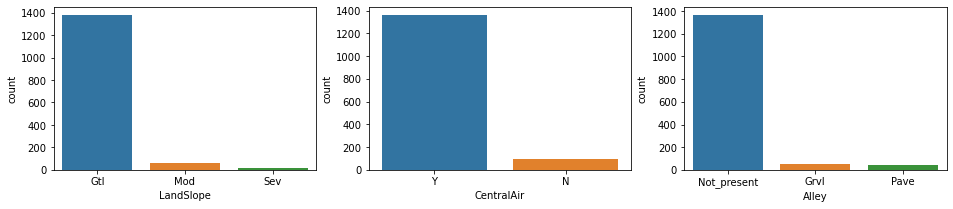

In [66]:
skew_cat_vars = ['LandSlope', 'CentralAir', 'Alley']

f, axes = plt.subplots(1, 3, figsize=(16, 5))
for i in range(0, len(skew_cat_vars)):
    _i = sns.violinplot(data=data, x = skew_cat_vars[i], y = 'LogSalePrice', ax=axes[i])
    
f, axes = plt.subplots(1, 3, figsize=(16, 3))
for i in range(0, len(skew_cat_vars)):
    _i = sns.countplot(data=data, x = skew_cat_vars[i], ax=axes[i])

# I do not see a relation in alley with SalePrice, whereas the distribution makes it already weak
# CentralAir does however seem to make quite a difference
# We can try to work with the Landslope as there appears to be an ordinal relation

In [9]:
# Plot the average prices per neighborhood
Avrg_sp_hood = pd.DataFrame(data.groupby('Neighborhood', axis=0)['SalePrice'].mean()).reset_index()
display_side_by_side(Avrg_sp_hood[:7], Avrg_sp_hood[7:13], Avrg_sp_hood[13:19], Avrg_sp_hood[19:])

,Neighborhood,SalePrice
0,Blmngtn,194870.882353
1,Blueste,137500.000000
2,BrDale,104493.750000
3,BrkSide,124834.051724
4,ClearCr,212565.428571
5,CollgCr,197965.773333
6,Crawfor,210624.725490
,Neighborhood,SalePrice
7,Edwards,128219.700000
8,Gilbert,192854.506329


With quite some online searches I found all the neighborhoods on the map <br>
(using the Zillow, Realtor, Addresreport and CityofAmes websites) <br>
Using the click2shp browser-based shapefile creation tool, I created shapesfiles for each neighborhood <br>
In a plot I will show the average SalePrice per neighborhood, later it is possible to create more features using the map

In [26]:
# Plot map using folium
create_map_from_shapes(shapefile_path, Avrg_sp_hood, middlepoint=[42.05, -93.64], zoom=12)

It certainly looks like the North-West area is the most expensive <br>
Also many neighborhoods are not included in the data

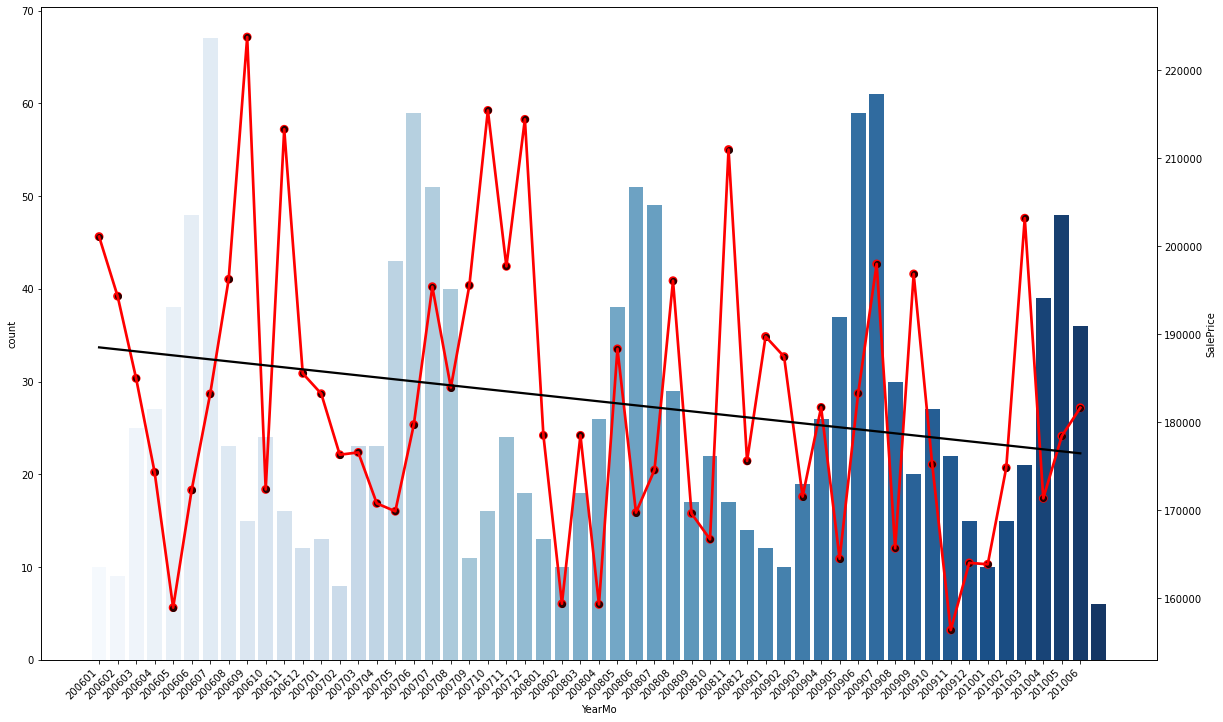

In [27]:
# Check if there is a seasonal trend in the SalePrice
data['YearMo'] = pd.to_numeric(data['YrSold'].astype('str') + data['MoSold'].apply('{:0>2}'.format))
monthly_sale_prices = pd.DataFrame(data.groupby('YearMo', axis=0)['SalePrice'].mean()).reset_index()
monthly_sale_prices['month_nr'] = range(0, len(monthly_sale_prices['YearMo']))
monthly_sale_prices = monthly_sale_prices.iloc[:monthly_sale_prices.shape[0] -1,:] #Remove one outlier

fig, ax = plt.subplots()
ax2 = plt.twinx()
countplt = sns.countplot(data['YearMo'], ax=ax, palette='Blues')
pointplt = sns.pointplot('YearMo', 'SalePrice', data=monthly_sale_prices, ax=ax2, color='red')
regplt = sns.regplot(x='month_nr',y='SalePrice', ax=ax2,data=monthly_sale_prices,fit_reg=True, color='black', ci=0)
loc, labels = plt.xticks()
countplt.set_xticklabels(labels, rotation=45, ha='right');

I see two things here. First is the downward slope of the regression line. Which means that in general the houseprices decrease over time. Second is the seasonality. Around the month of May every year, the number of houses being sold goes up (being the barplot) and evidently the average SalePrice goes down (the pointplot). Around September-October, the number of houses sold goes down, which moves the average housing prices up.

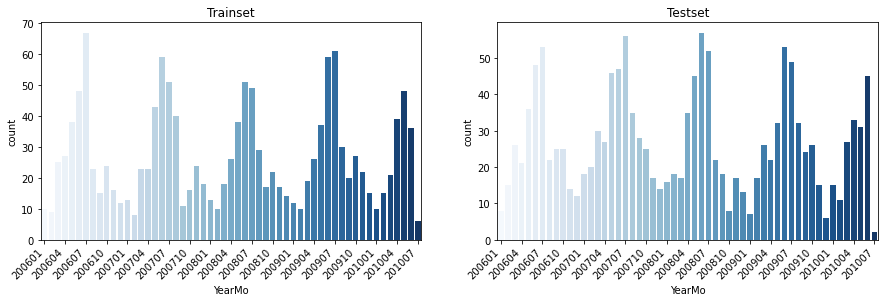

In [31]:
# Check if testset is a (random) sample in terms of time or a new timeframe for which we need to predict
validation['YearMo'] = pd.to_numeric(validation['YrSold'].astype('str') + validation['MoSold'].apply('{:0>2}'.format))
f, axes = plt.subplots(1, 2, figsize=(15, 4))
_ = countplt = sns.countplot(data['YearMo'], ax=axes[0], palette = 'Blues')
_ = countplt.set_xticklabels(axes[0].get_xticklabels()[::3], rotation=45, ha='right');
_ = axes[0].set_xticks(axes[0].get_xticks()[::3])
_ = countplt.set_title('Trainset')
_ = countplt2 = sns.countplot(validation['YearMo'], ax=axes[1], palette = 'Blues')
_ = countplt2.set_xticklabels(axes[1].get_xticklabels()[::3], rotation=45, ha='right');
_ = axes[1].set_xticks(axes[1].get_xticks()[::3])
_ = countplt2.set_title('Testset')

The distribution is similar and the testdate does not contain months of unseen data in the trainset

,LogSalePrice
SalePrice,0.948374
OverallQual,0.817184
GrLivArea,0.700927
GarageCars,0.680625
GarageArea,0.650888
TotalBsmtSF,0.612134
1stFlrSF,0.596981
FullBath,0.594771
YearBuilt,0.586570
YearRemodAdd,0.565608


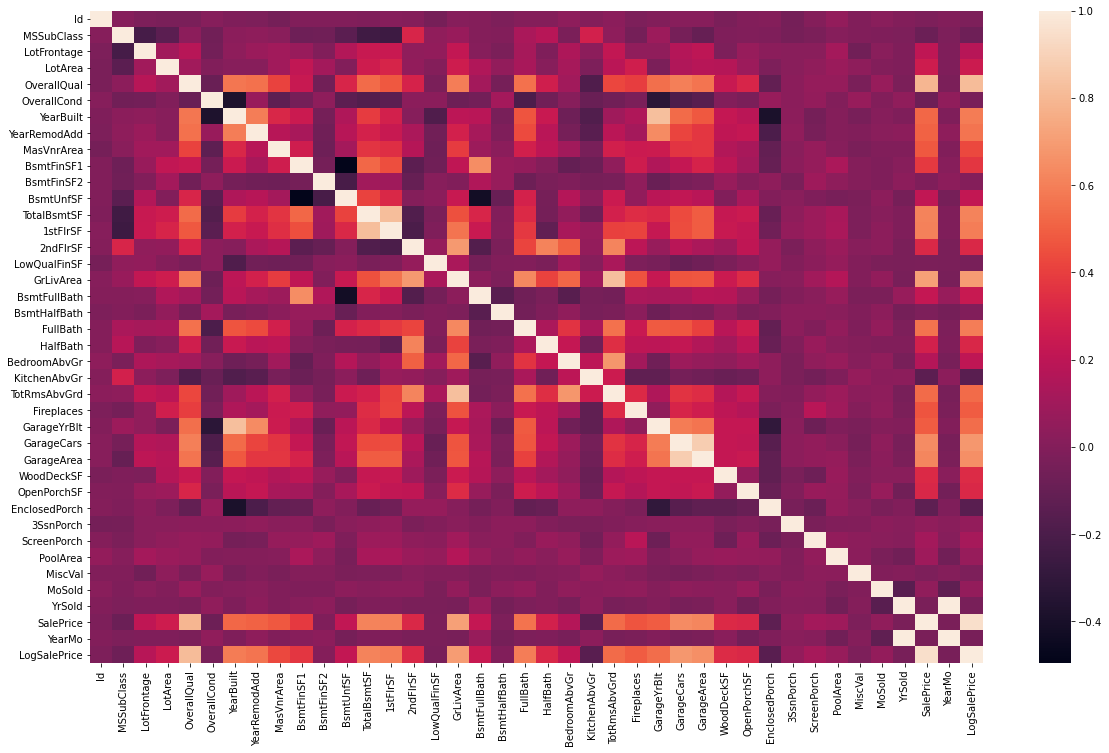

In [68]:
# In order to give us a start I am going to check the correlation of the continuous variables with SalePrice
con_cols = ['SalePrice']
for column in data.columns: 
    if data[column].dtype != 'O': con_cols.append(column)

corr_matrix = data.corr()
corr_list = [pd.DataFrame(corr_matrix['LogSalePrice'].sort_values(ascending=False))[x:x+11] for x in range(1, len(con_cols), 11)]
display_side_by_side(*corr_list)
sns.heatmap(corr_matrix);

In [69]:
# In order to get an idea which categorical features might be important I am going to use mean encodings 
# To prevent data leakage we will replace the mean encoding in the train set later in the cross validation process
# For the validation set it is however handy to already have the mean encodings in place
cat_cols = []
for column in data.columns: 
    if data[column].dtype == 'O': cat_cols.append(column)

for column in cat_cols:
    means = data[data['SalePrice'] > 0].groupby(column).LogSalePrice.mean()
    data['ME_'+column] = data[column].map(means)

,LogSalePrice
ME_Neighborhood,0.755518
ME_ExterQual,0.679060
ME_BsmtQual,0.672533
ME_KitchenQual,0.669059
ME_GarageFinish,0.617279
,LogSalePrice
ME_GarageType,0.578480
ME_FireplaceQu,0.557582
ME_Foundation,0.551045
ME_HeatingQC,0.483236


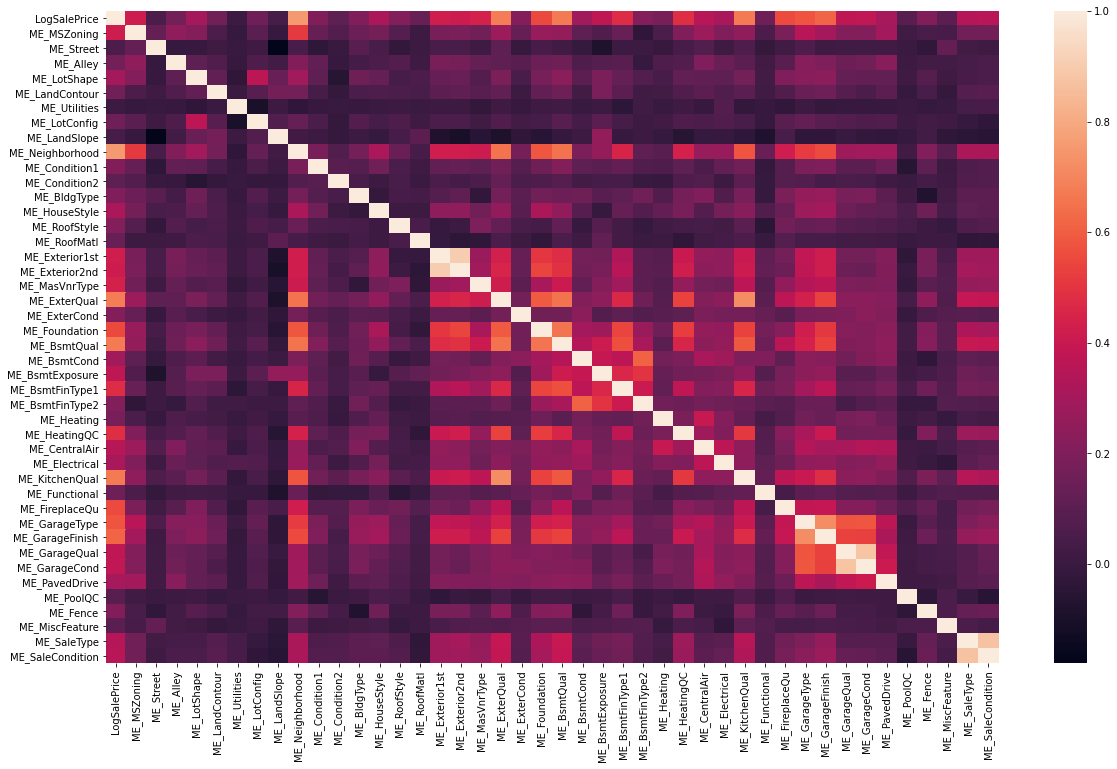

In [71]:
# Now check the mean encoded features in correlation with the actual SalePrice
ME_cat_cols = list(itertools.chain(*[['LogSalePrice'], data.columns[data.columns.str.contains(pat = 'ME_')].tolist()]))

corr_matrix = data[ME_cat_cols].corr()
corr_list = [pd.DataFrame(corr_matrix['LogSalePrice'].sort_values(ascending=False))[x:x+5] for x in range(1, len(ME_cat_cols), 5)]
display_side_by_side(*corr_list)
sns.heatmap(corr_matrix);

In [73]:
data[['OverallQual']].describe()

,OverallQual
count,1460.000000
mean,6.099315
std,1.382997
min,1.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


In [74]:
data.groupby(['OverallQual'])['LogSalePrice'].mean()

OverallQual
1     10.798804
2     10.825383
3     11.337474
4     11.557148
5     11.780657
6     11.967308
7     12.221773
8     12.497191
9     12.793268
10    12.921305
Name: LogSalePrice, dtype: float64

In [75]:
data[['1stFlrSF', '2ndFlrSF']].describe()

,1stFlrSF,2ndFlrSF
count,1460.000000,1460.000000
mean,1162.626712,346.992466
std,386.587738,436.528436
min,334.000000,0.000000
25%,882.000000,0.000000
50%,1087.000000,0.000000
75%,1391.250000,728.000000
max,4692.000000,2065.000000


In [76]:
data['1st_2nd_floor_ratio'] = data['2ndFlrSF'] / data['1stFlrSF']
data[['1st_2nd_floor_ratio']].describe()

,1st_2nd_floor_ratio
count,1460.000000
mean,0.358380
std,0.446071
min,0.000000
25%,0.000000
50%,0.000000
75%,0.787792
max,2.882828


In [78]:
data.loc[data['1st_2nd_floor_ratio'] > 1, ['GrLivArea', '1stFlrSF', '2ndFlrSF', '1st_2nd_floor_ratio']].shape

(135, 4)

In [80]:
data['1st_plus_living_and_2nd_floor_ratio'] = data['2ndFlrSF'] / (data['1stFlrSF'] + data['GrLivArea'])
data.loc[data['1st_plus_living_and_2nd_floor_ratio'] > 1, 
         ['GrLivArea', '1stFlrSF', '2ndFlrSF', '1st_2nd_floor_ratio', '1st_plus_living_and_2nd_floor_ratio']].shape
data[['GrLivArea', '1stFlrSF', '2ndFlrSF', '1st_2nd_floor_ratio', '1st_plus_living_and_2nd_floor_ratio']].describe()

(0, 5)

,GrLivArea,1stFlrSF,2ndFlrSF,1st_2nd_floor_ratio,1st_plus_living_and_2nd_floor_ratio
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,1162.626712,346.992466,0.358380,0.123762
std,525.480383,386.587738,436.528436,0.446071,0.148537
min,334.000000,334.000000,0.000000,0.000000,0.000000
25%,1129.500000,882.000000,0.000000,0.000000,0.000000
50%,1464.000000,1087.000000,0.000000,0.000000,0.000000
75%,1776.750000,1391.250000,728.000000,0.787792,0.282392
max,5642.000000,4692.000000,2065.000000,2.882828,0.590401


In [83]:
data.loc[data['1stFlrSF'] == data['2ndFlrSF'], ['GrLivArea', '1stFlrSF', '2ndFlrSF']].shape
data.loc[data['1stFlrSF'] == data['2ndFlrSF'], ['GrLivArea', '1stFlrSF', '2ndFlrSF']].head()

(55, 3)

,GrLivArea,1stFlrSF,2ndFlrSF
57,1720,860,860
87,1224,612,612
115,1458,729,729
119,1456,728,728
181,1802,901,901


In [84]:
data[data['GrLivArea'] > (data['1stFlrSF'] + data['2ndFlrSF'])].shape

(26, 128)

In [85]:
data[data['GrLivArea'] > (data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF'])].shape

(1, 128)

In [86]:
data[data['GrLivArea'] == (data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF'])].shape

(36, 128)

In [87]:
data[data['GrLivArea'] == (data['1stFlrSF'] + data['2ndFlrSF'])].shape

(1434, 128)

In [88]:
data['GarageCars'].value_counts()

2    824
1    369
3    181
0    81 
4    5  
Name: GarageCars, dtype: int64

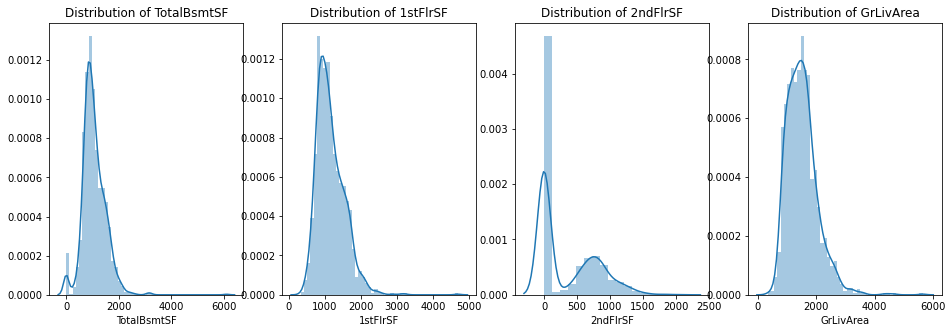

In [91]:
SF_vars = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']

f, axes = plt.subplots(1, 4, figsize=(16, 5))
for i in range(0, len(SF_vars)):
    _i = sns.distplot(data[SF_vars[i]], ax=axes[i]) 
    _i = _i.set_title('Distribution of {}'.format(SF_vars[i]))

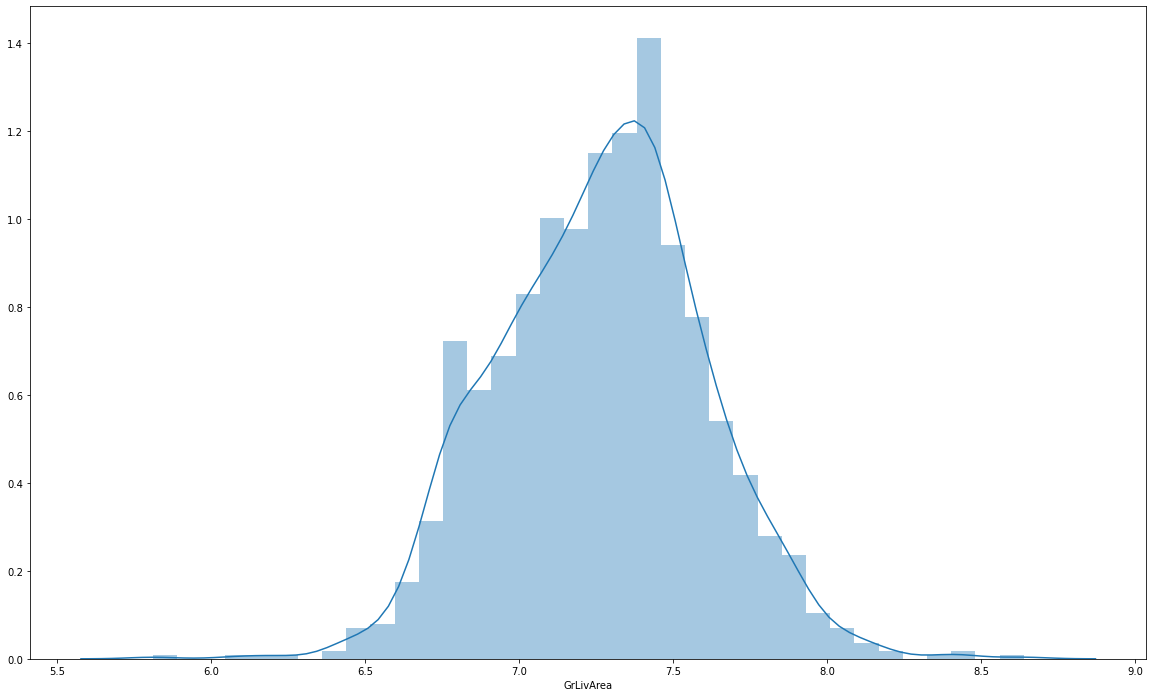

In [92]:
sns.distplot(np.log(data['GrLivArea']))

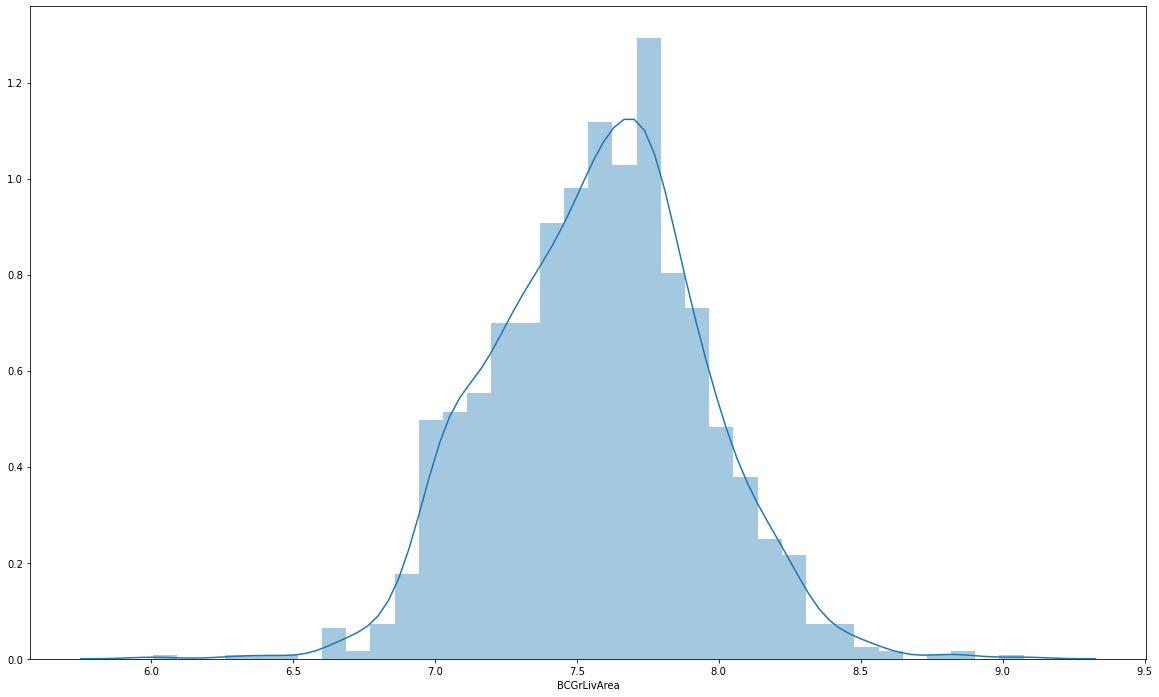

In [94]:
data['BCGrLivArea'] = data['GrLivArea'] + 0.001
lambda_ = stats.boxcox_normmax(data['BCGrLivArea'], brack=(-1.0, 1.0))
data['BCGrLivArea'] = stats.boxcox(data['BCGrLivArea'], lambda_)
sns.distplot(data['BCGrLivArea'])

In [97]:
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst    86 
Gilbert    79 
NridgHt    77 
Sawyer     74 
NWAmes     73 
SawyerW    59 
BrkSide    58 
Crawfor    51 
Mitchel    49 
NoRidge    41 
Timber     38 
IDOTRR     37 
ClearCr    28 
StoneBr    25 
SWISU      25 
MeadowV    17 
Blmngtn    17 
BrDale     16 
Veenker    11 
NPkVill    9  
Blueste    2  
Name: Neighborhood, dtype: int64

In [98]:
[x for x in validation['Neighborhood'].unique() if x not in data['Neighborhood'].unique()]

[]

In [101]:
data.groupby(['Neighborhood']).agg({'Neighborhood': 'count', 'LogSalePrice': 'mean'}).sort_values(by='LogSalePrice', ascending=False)

,Neighborhood,LogSalePrice
Neighborhood,,
NoRidge,41,12.676000
NridgHt,77,12.619411
StoneBr,25,12.585486
Timber,38,12.363455
Veenker,11,12.344176
Somerst,86,12.296495
ClearCr,28,12.239900
Crawfor,51,12.206659
Blmngtn,17,12.169416


In [108]:
neighbor_dummies = pd.get_dummies(data['Neighborhood'])
neighbor_dummies.columns = ['Nbrh_dum_' + str(col) for col in neighbor_dummies.columns]
data = pd.concat([data, neighbor_dummies.iloc[:, 1:]], axis=1)

In [110]:
all_data = pd.concat([all_data, neighbor_dummies], axis=1)

Index(['Nbrh_dum_Blmngtn', 'Nbrh_dum_Blueste', 'Nbrh_dum_BrDale',
       'Nbrh_dum_BrkSide', 'Nbrh_dum_ClearCr', 'Nbrh_dum_CollgCr',
       'Nbrh_dum_Crawfor', 'Nbrh_dum_Edwards', 'Nbrh_dum_Gilbert',
       'Nbrh_dum_IDOTRR', 'Nbrh_dum_MeadowV', 'Nbrh_dum_Mitchel',
       'Nbrh_dum_NAmes', 'Nbrh_dum_NPkVill', 'Nbrh_dum_NWAmes',
       'Nbrh_dum_NoRidge', 'Nbrh_dum_NridgHt', 'Nbrh_dum_OldTown',
       'Nbrh_dum_SWISU', 'Nbrh_dum_Sawyer', 'Nbrh_dum_SawyerW',
       'Nbrh_dum_Somerst', 'Nbrh_dum_StoneBr', 'Nbrh_dum_Timber',
       'Nbrh_dum_Veenker'],
      dtype='object')

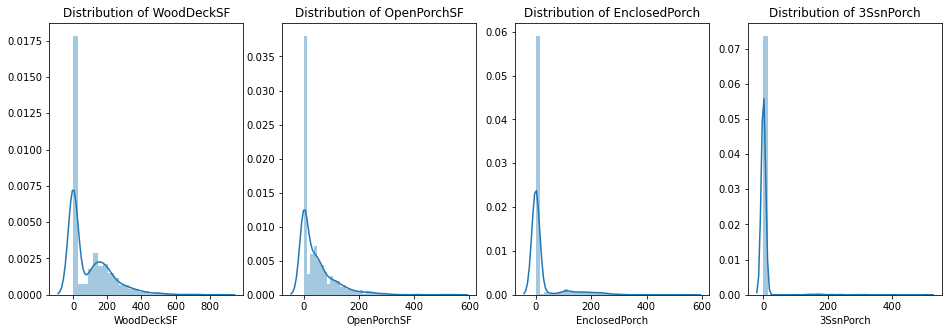

In [117]:
porch_vars = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch']

f, axes = plt.subplots(1, 4, figsize=(16, 5))
for i in range(0, len(porch_vars)):
    _i = sns.distplot(data[porch_vars[i]], ax=axes[i]) 
    _i = _i.set_title('Distribution of {}'.format(porch_vars[i]))

In [119]:
(data['LotArea'] - data['1stFlrSF'] - data['GarageArea']).describe()

count    1460.000000  
mean     8881.221233  
std      9839.749846  
min      277.000000   
25%      6102.250000  
50%      7864.000000  
75%      9827.250000  
max      212696.000000
dtype: float64

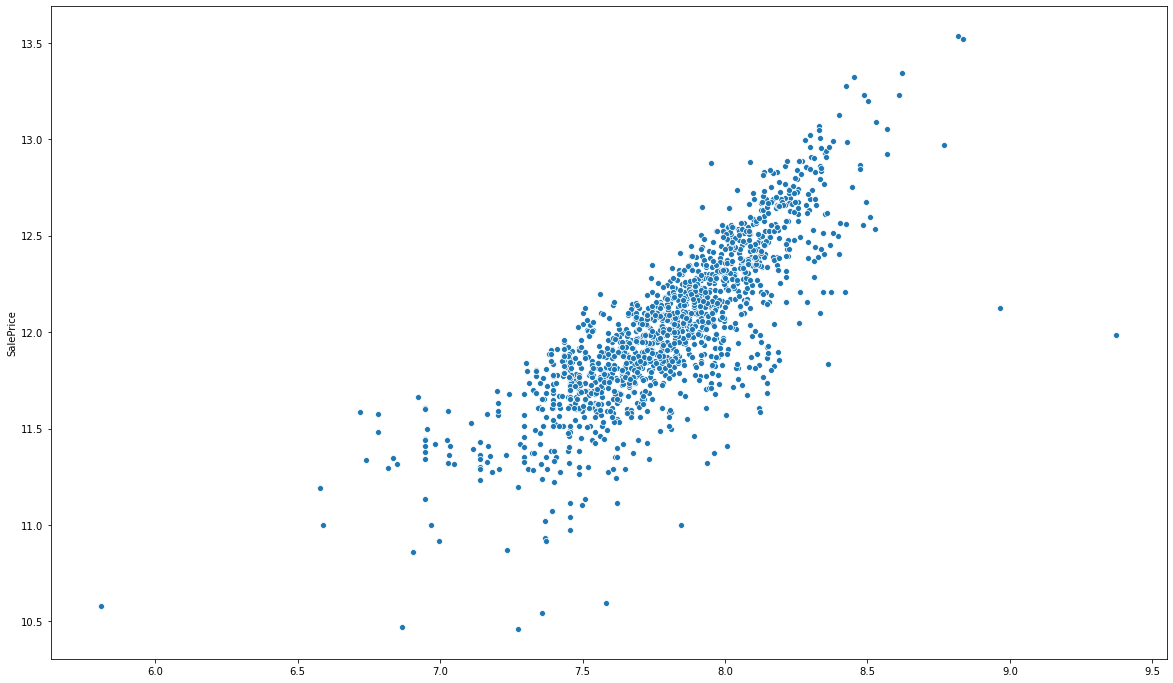

In [121]:
sns.scatterplot(np.log(np.sum(data[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']], axis=1)), np.log(data['SalePrice']))

In [123]:
np.log(np.sum(data[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']], axis=1)).sort_values(ascending=False)

1298    9.371779
523     8.963672
1182    8.835210
691     8.818778
496     8.768419
          ...   
1035    6.739337
532     6.717805
1100    6.590301
1321    6.579251
533     5.811141
Length: 1460, dtype: float64

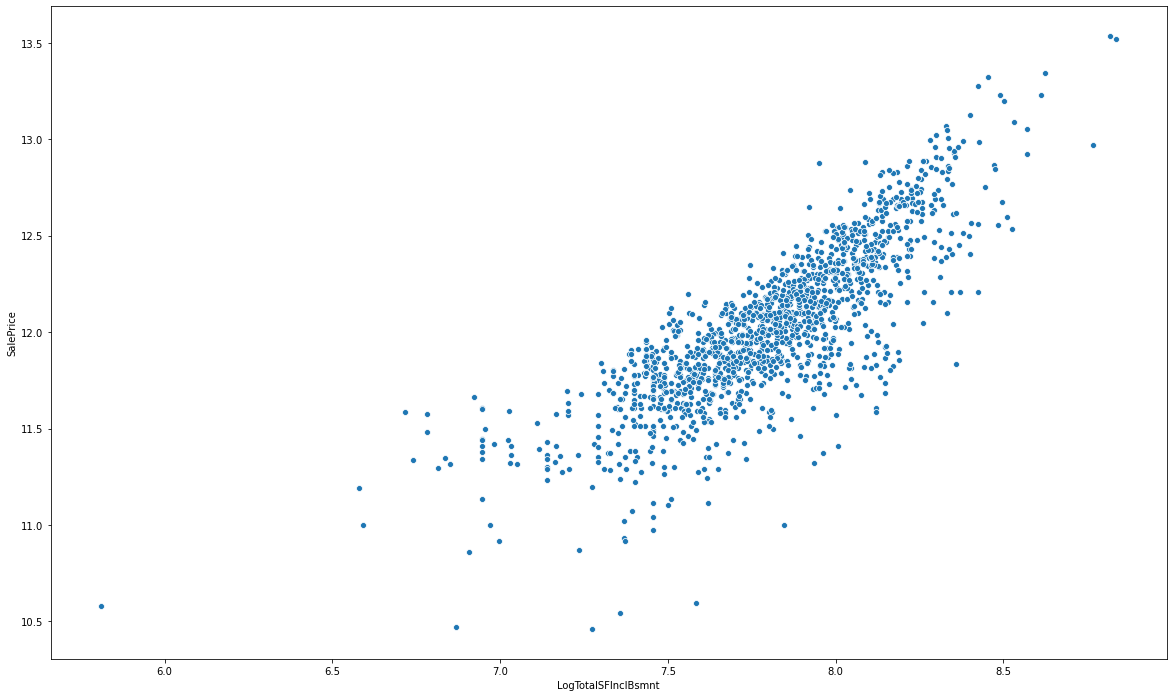

In [125]:
data['LogTotalSFInclBsmnt'] = np.log(np.sum(data[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']], axis=1))
data = data[data['LogTotalSFInclBsmnt'] < 8.9]
sns.scatterplot(data['LogTotalSFInclBsmnt'], np.log(data['SalePrice']))

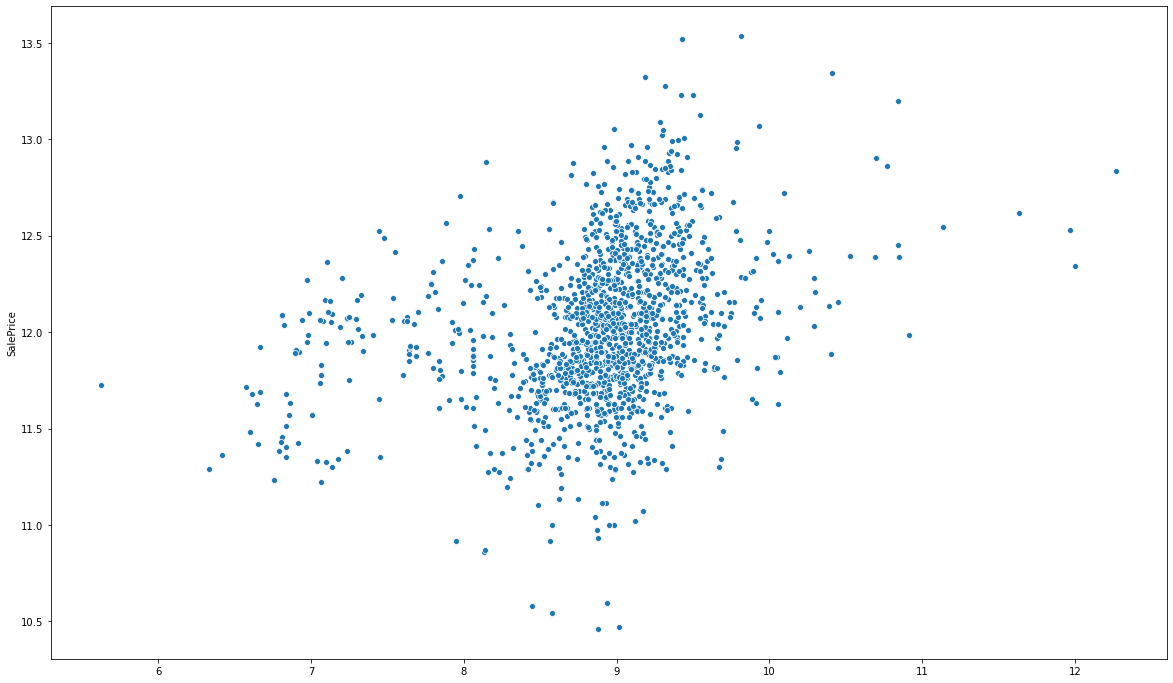

In [126]:
sns.scatterplot(np.log1p(data['LotArea'] - data['1stFlrSF'] - data['GarageArea']), np.log(data['SalePrice']))

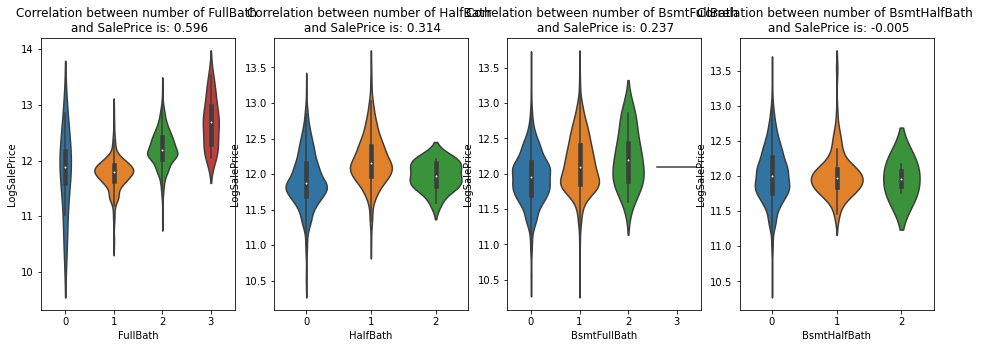

In [130]:
# Lets check if more baths means a higher SalePrice
bath_vars = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', ]

f, axes = plt.subplots(1, 4, figsize=(16, 5))
for i in range(0, len(bath_vars)):
    _i = sns.violinplot(data=data, x = bath_vars[i], y = 'LogSalePrice', ax=axes[i])
    _i = _i.set_title('Correlation between number of {0} \n and SalePrice is: {1:.3f}'.format(
            bath_vars[i], np.corrcoef(data[bath_vars[i]], data['LogSalePrice'])[0,1]))

In [135]:
for col in ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']:
    data[col].value_counts().reset_index().sort_values('index')

,index,FullBath
3,0,9
1,1,650
0,2,767
2,3,32


,index,HalfBath
0,0,913
1,1,533
2,2,12


,index,BsmtFullBath
0,0,856
1,1,587
2,2,14
3,3,1


,index,BsmtHalfBath
0,0,1376
1,1,80
2,2,2


In [ ]:
'GarageYrBlt'

In [136]:
data[['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']].head(20)

,GarageYrBlt,YearBuilt,YearRemodAdd
0,2003.0,2003,2003
1,1976.0,1976,1976
2,2001.0,2001,2002
3,1998.0,1915,1970
4,2000.0,2000,2000
5,1993.0,1993,1995
6,2004.0,2004,2005
7,1973.0,1973,1973
8,1931.0,1931,1950
9,1939.0,1939,1950


In [137]:
data[data['GarageYrBlt'] == data['YearBuilt']].shape, data[data['GarageYrBlt'] != data['YearBuilt']].shape

((1087, 130), (371, 130))

In [139]:
data.loc[data['GarageYrBlt'] != data['YearBuilt'], ['GarageYrBlt', 'YearBuilt']].head()

,GarageYrBlt,YearBuilt
3,1998.0,1915
15,1991.0,1929
26,2005.0,1951
27,2008.0,2007
29,1920.0,1927


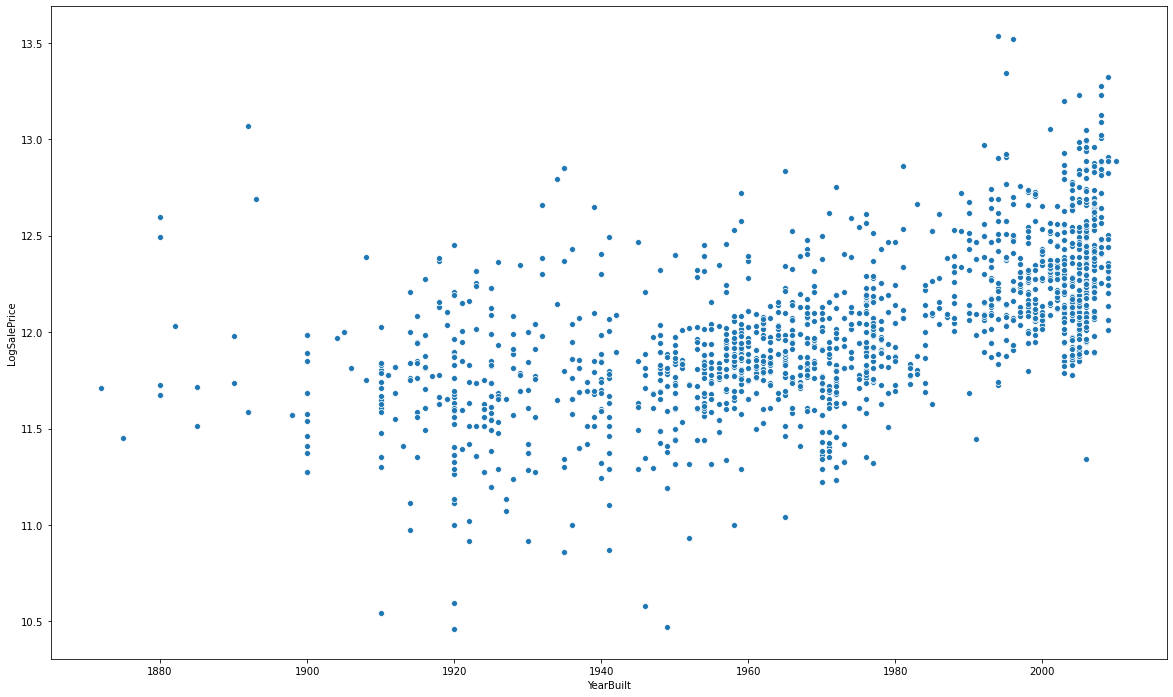

In [138]:
sns.scatterplot(data['YearBuilt'], data['LogSalePrice'])

In [145]:
data['LogYardArea'] = np.log(data['LotArea'] - data['1stFlrSF'] - data['GarageArea'])
data['AllBathsSum'] = np.sum(data[['BsmtHalfBath', 'HalfBath', 'BsmtFullBath', 'FullBath']], axis=1)

In [146]:
data[['OverallQual', 'LogTotalSFInclBsmnt', 'GarageCars', 'ME_Neighborhood',
                   'LogYardArea', 'AllBathsSum', 'YearBuilt']].corr()


,OverallQual,LogTotalSFInclBsmnt,GarageCars,ME_Neighborhood,LogYardArea,AllBathsSum,YearBuilt
OverallQual,1.000000,0.674368,0.600741,0.693372,0.099732,0.524783,0.571368
LogTotalSFInclBsmnt,0.674368,1.000000,0.556035,0.567976,0.331927,0.583811,0.364523
GarageCars,0.600741,0.556035,1.000000,0.588586,0.186643,0.467870,0.537301
ME_Neighborhood,0.693372,0.567976,0.588586,1.000000,0.215510,0.520278,0.682471
LogYardArea,0.099732,0.331927,0.186643,0.215510,1.000000,0.153780,-0.046425
AllBathsSum,0.524783,0.583811,0.467870,0.520278,0.153780,1.000000,0.506111
YearBuilt,0.571368,0.364523,0.537301,0.682471,-0.046425,0.506111,1.000000


In [154]:
scaler = preprocessing.StandardScaler(with_mean=True, with_std=False).fit(np.array(data['YearBuilt']).reshape(-1, 1))
scaler.transform(np.array(data['YearBuilt']).reshape(-1, 1))

array([[ 31.781893],
       [  4.781893],
       [ 29.781893],
       ...,
       [-30.218107],
       [-21.218107],
       [ -6.218107]])

In [155]:
data['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1458, dtype: int64

In [ ]:
ME_ExterQual
ME_BsmtQual
ME_KitchenQual
ME_FireplaceQu
ME_HeatingQC
ME_GarageQual

GarageFinish
GarageType
BsmtExposure

In [160]:
data['GarageQual'].value_counts(), data['GarageCond'].value_counts()

(TA             1309
 Not_present    81  
 Fa             48  
 Gd             14  
 Po             3   
 Ex             3   
 Name: GarageQual, dtype: int64,
 TA             1324
 Not_present    81  
 Fa             35  
 Gd             9   
 Po             7   
 Ex             2   
 Name: GarageCond, dtype: int64)

In [164]:
data['GarageFinish'].value_counts(),
data['GarageType'].value_counts(),
data['GarageQual'].value_counts()

(Unf            605
 RFn            422
 Fin            350
 Not_present    81 
 Name: GarageFinish, dtype: int64,)

(Attchd         869
 Detchd         387
 BuiltIn        87 
 Not_present    81 
 Basment        19 
 CarPort        9  
 2Types         6  
 Name: GarageType, dtype: int64,)

TA             1309
Not_present    81  
Fa             48  
Gd             14  
Po             3   
Ex             3   
Name: GarageQual, dtype: int64

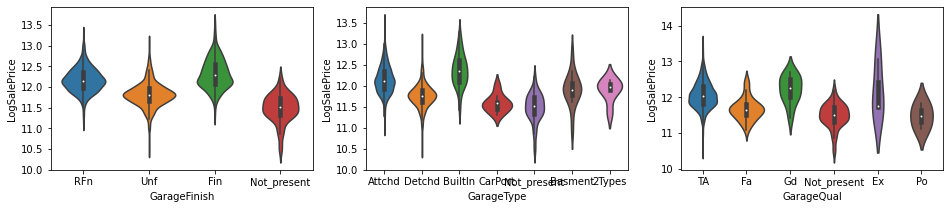

In [165]:
garage_vars = ['GarageFinish', 'GarageType', 'GarageQual']

f, axes = plt.subplots(1, 3, figsize=(16, 3))
for i in range(0, len(garage_vars)):
    _i = sns.violinplot(data=data, x = garage_vars[i], y = 'LogSalePrice', ax=axes[i])

In [167]:
data[data['GarageType'].isin(['Attchd', 'Detchd'])].groupby(['GarageType', 'GarageQual'])['LogSalePrice'].mean()

GarageType  GarageQual
Attchd      Fa            11.809953
            Gd            12.260426
            TA            12.162400
Detchd      Ex            12.175449
            Fa            11.677812
            Gd            12.017928
            Po            11.472494
            TA            11.771204
Name: LogSalePrice, dtype: float64

In [170]:
replace_garagetype = {'Attchd': 'Attached', 'Detchd': 'Detached', 'BuiltIn': 'Attached', 'CarPort': 'Not_present', 
                      'not_present': 'not_present', '2Types': 'Attached', 'Basment': 'Detached'}
data['GarageType'].replace(replace_garagetype).value_counts()

Attached       962
Detached       406
Not_present    90 
Name: GarageType, dtype: int64

In [171]:
data['Foundation'].value_counts()

PConc     645
CBlock    634
BrkTil    146
Slab      24 
Stone     6  
Wood      3  
Name: Foundation, dtype: int64

In [172]:
data.groupby(['Foundation'])['LogSalePrice'].mean()

Foundation
BrkTil    11.722528
CBlock    11.870080
PConc     12.262306
Slab      11.532959
Stone     11.933156
Wood      12.102479
Name: LogSalePrice, dtype: float64

In [ ]:
ME_FireplaceQu
ME_HeatingQC

In [173]:
data['KitchenQual'].value_counts(), data['BsmtQual'].value_counts()

(TA    735
 Gd    586
 Ex    98 
 Fa    39 
 Name: KitchenQual, dtype: int64,
 TA             649
 Gd             618
 Ex             119
 Not_present    37 
 Fa             35 
 Name: BsmtQual, dtype: int64)

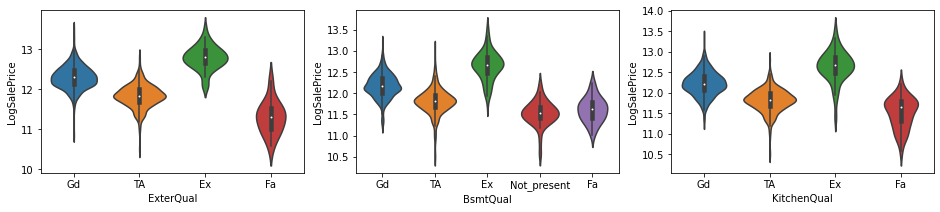

In [174]:
qual_vars = ['ExterQual', 'BsmtQual', 'KitchenQual']

f, axes = plt.subplots(1, 3, figsize=(16, 3))
for i in range(0, len(qual_vars)):
    _i = sns.violinplot(data=data, x = qual_vars[i], y = 'LogSalePrice', ax=axes[i])

In [178]:
data['MSSubClass'].value_counts().reset_index().sort_values(by='index')

,index,MSSubClass
0,20,536
4,30,69
14,40,4
12,45,12
2,50,144
1,60,297
6,70,60
11,75,16
7,80,58
10,85,20


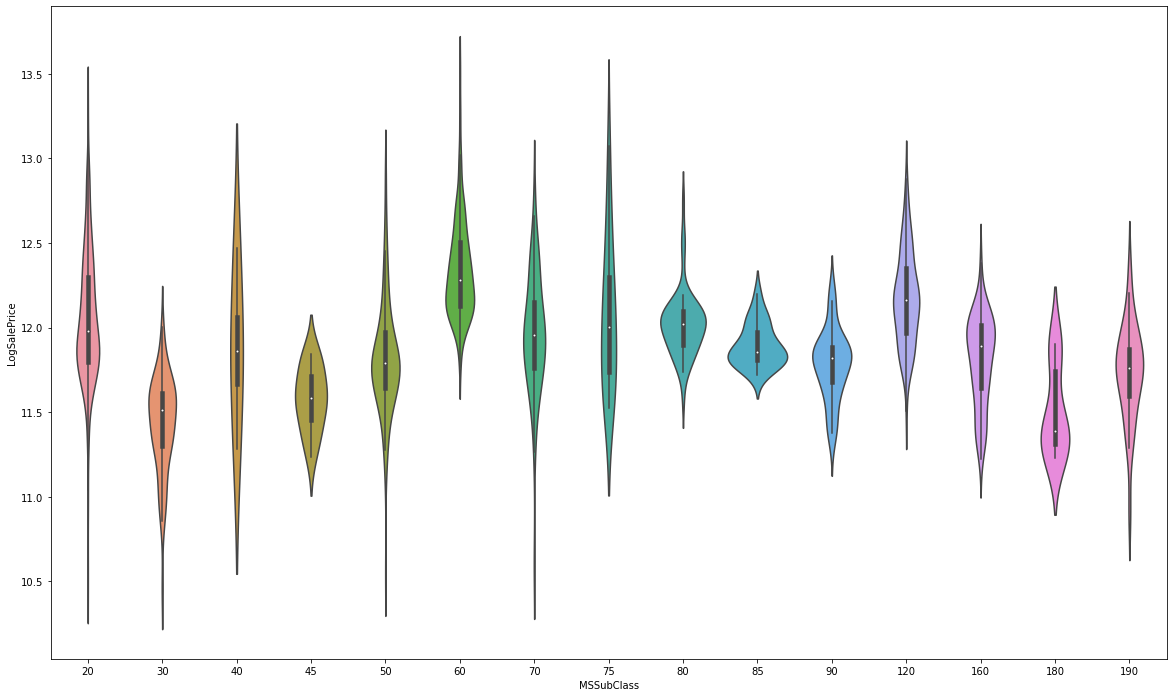

In [182]:
sns.violinplot(data['MSSubClass'], data['LogSalePrice'])

In [183]:
data['Heating'].value_counts(), data['HeatingQC'].value_counts()

(GasA     1426
 GasW     18  
 Grav     7   
 Wall     4   
 OthW     2   
 Floor    1   
 Name: Heating, dtype: int64,
 Ex    739
 TA    428
 Gd    241
 Fa    49 
 Po    1  
 Name: HeatingQC, dtype: int64)

In [185]:
data['FireplaceQu'].value_counts()

Not_present    690
Gd             378
TA             313
Fa             33 
Ex             24 
Po             20 
Name: FireplaceQu, dtype: int64

In [ ]:
# Check if there is a seasonal trend in the SalePrice
data['YearMo'] = pd.to_numeric(data['YrSold'].astype('str') + data['MoSold'].apply('{:0>2}'.format))
monthly_sale_prices = pd.DataFrame(data.groupby('YearMo', axis=0)['SalePrice'].mean()).reset_index()
monthly_sale_prices['month_nr'] = range(0, len(monthly_sale_prices['YearMo']))
monthly_sale_prices = monthly_sale_prices.iloc[:monthly_sale_prices.shape[0] -1,:] #Remove one outlier

fig, ax = plt.subplots()
ax2 = plt.twinx()
countplt = sns.countplot(data['YearMo'], ax=ax, palette='Blues')
pointplt = sns.pointplot('YearMo', 'SalePrice', data=monthly_sale_prices, ax=ax2, color='red')
regplt = sns.regplot(x='month_nr',y='SalePrice', ax=ax2,data=monthly_sale_prices,fit_reg=True, color='black', ci=0)
loc, labels = plt.xticks()
countplt.set_xticklabels(labels, rotation=45, ha='right');

In [201]:
yearmo_df = pd.DataFrame({'YearMo': data['YearMo'].unique()}).sort_values(by='YearMo')
yearmo_df['yearmo_nr'] = range(1, len(data['YearMo'].unique()) + 1)

In [203]:
data = data.merge(yearmo_df, how='left', on='YearMo')

In [252]:
# set x and u to be rounded time to departure and average conversion rate for that rounded ttd
x = data['yearmo_nr']
y = data['LogSalePrice']

# transforming the data to include another axis
x = x[:, np.newaxis] # Simply rows of 1 value arrays 
y = y[:, np.newaxis]

# Transform feature to multiple polynomial features
polynomial_features = PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(x)

# Fit regression to the features that are now plural
model = LinearRegression()
model.fit(x_poly, y)

# Use the regression coefficients to predict an y
# By using the full set as input the line is now 'perfect'
data['yearmo_fittedline'] = model.predict(x_poly).flatten()

LinearRegression()

In [222]:
mean_yearmo = data.groupby('YearMo')['LogSalePrice'].mean().reset_index()
mean_yearmo['yearmo_nr'] = range(len(mean_yearmo))
mean_yearmo['smooth_line'] = line_smoother(mean_yearmo, 'LogSalePrice')

In [245]:
mean_yearmo.head()

,YearMo,LogSalePrice,yearmo_nr,smooth_line
0,200601,12.137672,0,12.137672
1,200602,12.162326,1,12.117129
2,200603,12.051388,2,12.063620
3,200604,11.977148,3,11.987058
4,200605,11.932637,4,11.961448


In [242]:
def line_smoother(data, col):
    smoothed = [data[col][0]]
    for i in range(1, len(data[col])-1):
        smoothed.append(np.mean([data[col][i-1], data[col][i], data[col][i+1]]))
    smoothed.append(data.loc[len(data)-1, col])
    return smoothed

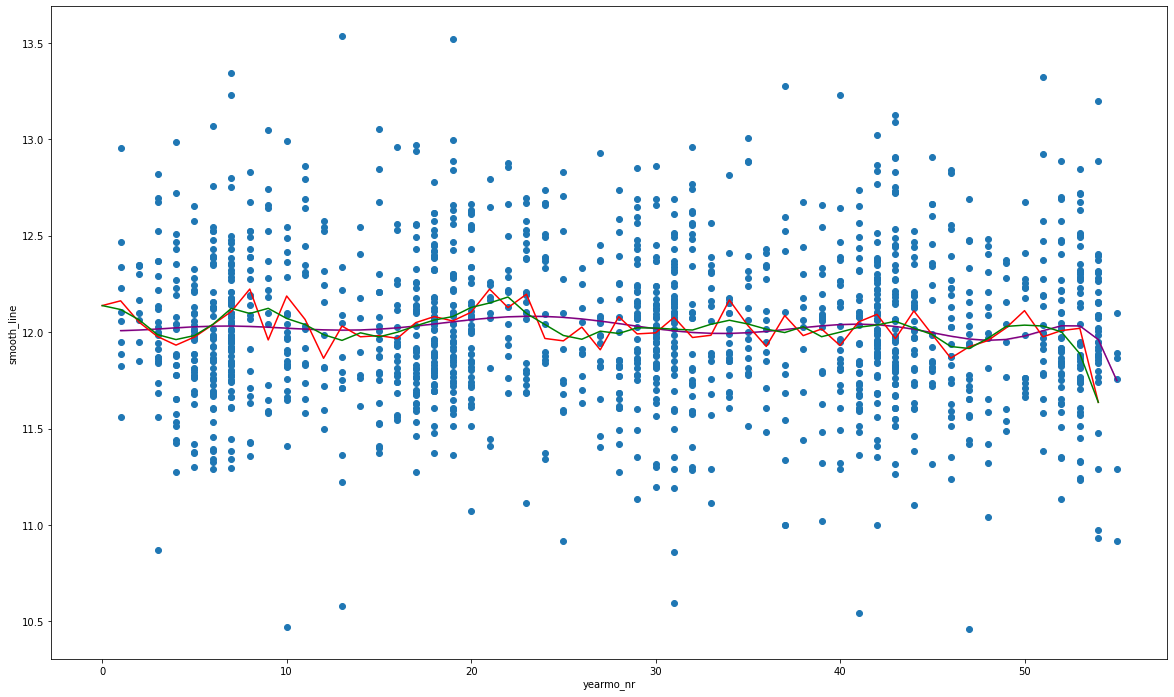

In [253]:
plt.scatter(data['yearmo_nr'], data['LogSalePrice'])
sns.lineplot(data['yearmo_nr'], data['yearmo_fittedline'], color='purple')
sns.lineplot(mean_yearmo['yearmo_nr'], mean_yearmo['LogSalePrice'], color='red')
sns.lineplot(mean_yearmo['yearmo_nr'], mean_yearmo['smooth_line'], color='green')

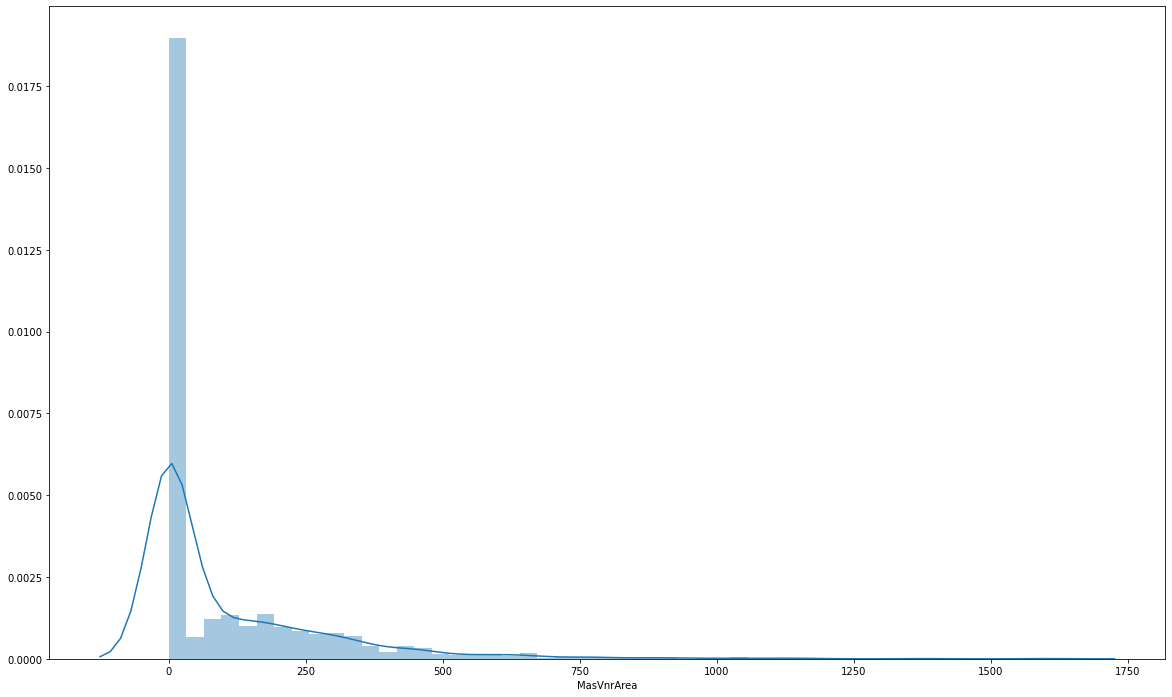

In [254]:
sns.distplot(data['MasVnrArea'])

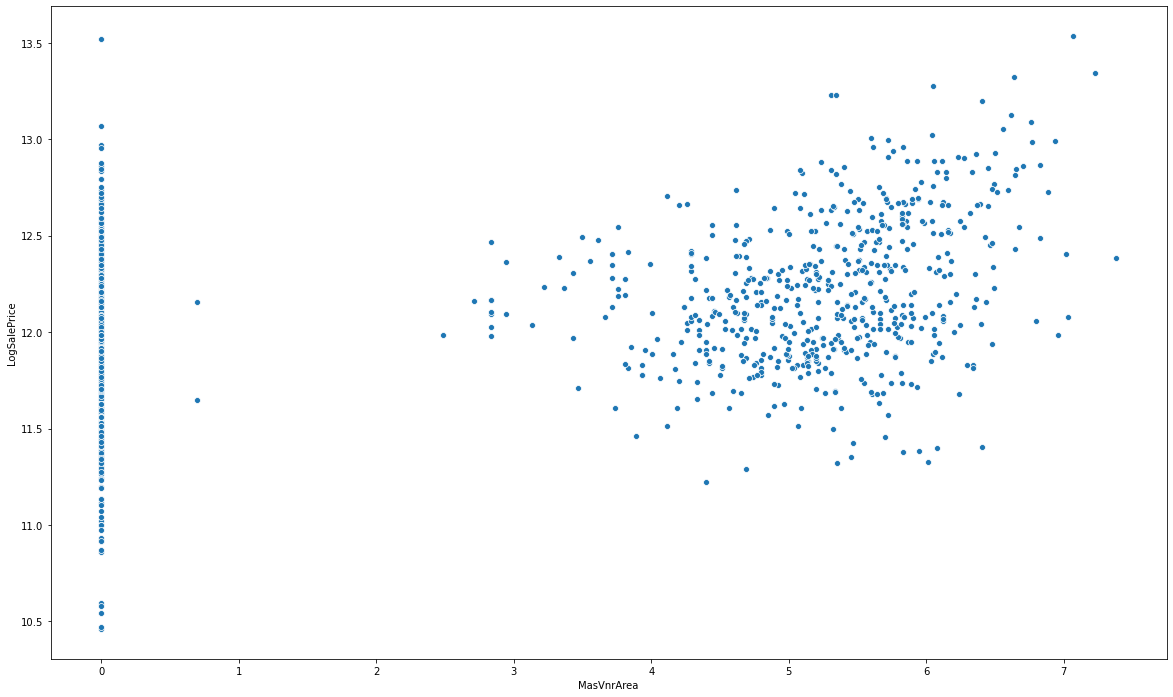

In [256]:
sns.scatterplot(np.log1p(data['MasVnrArea']), data['LogSalePrice'])

In [257]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      126
BrkCmn     15 
Name: MasVnrType, dtype: int64

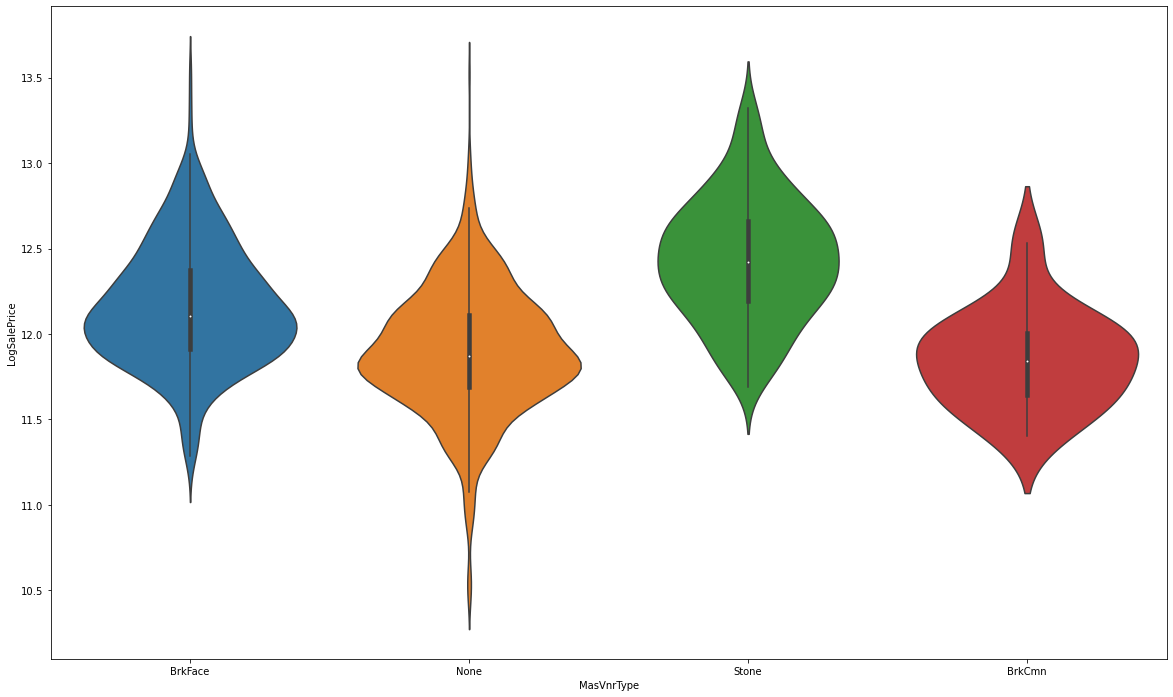

In [258]:
sns.violinplot(data['MasVnrType'], data['LogSalePrice'])

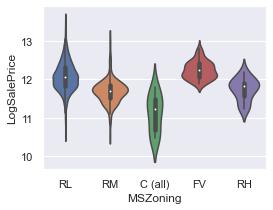

In [263]:
sns.set(rc={'figure.figsize':(4,3)})
sns.violinplot(data['MSZoning'], data['LogSalePrice'])

In [260]:
data['CentralAir'].value_counts()

Y    1363
N    95  
Name: CentralAir, dtype: int64

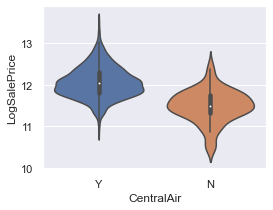

In [264]:
sns.violinplot(data['CentralAir'], data['LogSalePrice'])

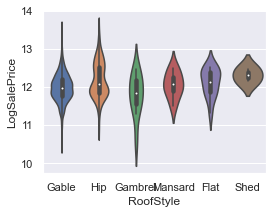

In [278]:
sns.violinplot(data['RoofStyle'], data['LogSalePrice'])

In [282]:
data['MiscVal'].value_counts()

0        1406
400      11  
500      8   
700      5   
450      4   
2000     4   
600      4   
1200     2   
480      2   
1150     1   
800      1   
15500    1   
620      1   
3500     1   
560      1   
2500     1   
1300     1   
1400     1   
350      1   
8300     1   
54       1   
Name: MiscVal, dtype: int64

In [284]:
replace_bsmtfintype = {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1, "Not_present": 0}
data['BsmtFinType1Num'] = data['BsmtFinType1'].replace(replace_bsmtfintype)
data['BsmtFinType2Num'] = data['BsmtFinType2'].replace(replace_bsmtfintype)

In [286]:
data['bsmt_score'] = data['BsmtFinSF1'] * data['BsmtFinType1Num'] + data['BsmtFinSF2'] * data['BsmtFinType2Num']

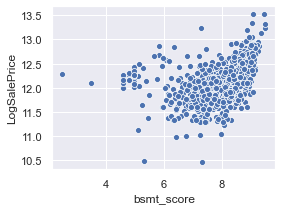

In [288]:
sns.scatterplot(np.log(data['bsmt_score']), data['LogSalePrice'])

In [ ]:
ME_Exterior1st
ME_Exterior2nd
ME_Electrical
ME_PavedDrive
ME_LotShape
ExterCond
RoofStyle
Condition1 + 2
Fence
BldgType
ME_MiscFeature
ME_PoolQC
MiscVal